In [1]:
# Dependencies and Setup    
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)


624

## Perform API Calls¶
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Build a query to get the data for a specific city
query = f"{url}appid={weather_api_key}&q="
# print(query)

In [4]:
weather_dict = []

# # Loop through the list of cities and perform a request for data on each
for city in cities:
    
    #   Get weather data
    response = requests.get(query + city).json()
    time.sleep(1)
    
    # Control for errors      
    try:
        # Get weather responses
        name = (response['name'])
        id = (response['id'])
        lat = (response['coord']['lat'])
        lon = (response['coord']['lon'])
        temp = (response['main']['temp'])
        humidity = (response['main']['humidity'])
        cloudiness = (response['clouds']['all'])
        speed = (response['wind']['speed'])
        country = (response['sys']['country'])
        dt = (response['dt'])
        print(f'City Name: {city}, ID: {id}' )
        
        # Append responses to dictionary keys     
        weather_dict.append({
        'City': name,
        'Lat' : lat,
        'Lon' : lon,
        'Temp' : temp,
        'Humidity' : humidity,
        'Cloudiness' : cloudiness,
        'Wind Speed' : speed,
        'Country' : country,
        'Date' : dt
        })
       
        # Create a dataframe of weather data
        weather_data = pd.DataFrame(weather_dict)
      
    # Log City Names & IDs - Any Erros if they occur   
    except:             
        print(f"Key Error Ignore") 
        pass
    

City Name: arraial do cabo, ID: 3471451
City Name: mandleshwar, ID: 1263850
Key Error Ignore
City Name: broome, ID: 5110365
City Name: punta arenas, ID: 3874787
City Name: margate, ID: 2643044
City Name: rikitea, ID: 4030556
City Name: tiksi, ID: 2015306
City Name: atuona, ID: 4020109
City Name: pacific grove, ID: 5380437
City Name: busselton, ID: 2075265
City Name: nanortalik, ID: 3421765
City Name: luderitz, ID: 3355672
City Name: takoradi, ID: 2294915
City Name: port-gentil, ID: 2396518
City Name: benito juarez, ID: 3827406
City Name: cairns, ID: 2172797
City Name: baykit, ID: 1510689
City Name: thompson, ID: 6165406
City Name: vaini, ID: 4032243
Key Error Ignore
City Name: lorengau, ID: 2092164
City Name: bandarbeyla, ID: 64814
City Name: isangel, ID: 2136825
City Name: albany, ID: 5106841
City Name: santa marta, ID: 3668605
City Name: salalah, ID: 286621
City Name: east london, ID: 1006984
City Name: sai buri, ID: 1606851
City Name: narsaq, ID: 3421719
Key Error Ignore
Key Error I

City Name: choix, ID: 4014109
City Name: talnakh, ID: 1490256
City Name: prestea, ID: 2295840
City Name: lagoa, ID: 3372964
City Name: tongliao, ID: 2034400
City Name: turbat, ID: 1163054
City Name: richards bay, ID: 962367
City Name: pokhara, ID: 1282898
City Name: ocosingo, ID: 3522484
City Name: iquique, ID: 3887127
Key Error Ignore
Key Error Ignore
Key Error Ignore
City Name: christchurch, ID: 2192362
City Name: severo-kurilsk, ID: 2121385
City Name: yatou, ID: 1786855
City Name: huarmey, ID: 3939168
City Name: longyearbyen, ID: 2729907
Key Error Ignore
City Name: tevaitoa, ID: 4033375
City Name: sioux lookout, ID: 6148373
City Name: chapais, ID: 5919850
City Name: pisco, ID: 3932145
Key Error Ignore
City Name: serik, ID: 301101
City Name: melfi, ID: 3173615
City Name: alekseyevsk, ID: 2022083
City Name: sabang, ID: 1214026
City Name: tanout, ID: 2439155
City Name: kapaa, ID: 5848280
City Name: calabozo, ID: 3647444
City Name: pisz, ID: 762120
City Name: moskovskiy, ID: 857690
City

Key Error Ignore
City Name: manzhouli, ID: 2035836
City Name: manokwari, ID: 1636308
City Name: tailai, ID: 2034599
City Name: kerema, ID: 2094144
City Name: sao felix do xingu, ID: 3388847
City Name: ayolas, ID: 3439378
City Name: prince rupert, ID: 6113406
City Name: kyren, ID: 2021031
City Name: rayong, ID: 1607016
Key Error Ignore
City Name: ilulissat, ID: 3423146
City Name: kodyma, ID: 705493
City Name: hereford, ID: 2647074
City Name: berlevag, ID: 780687
City Name: rawson, ID: 3839307
City Name: malanje, ID: 2239862
City Name: virtsu, ID: 591189
City Name: caconda, ID: 3351380
City Name: hukuntsi, ID: 933726
City Name: tabuk, ID: 1684803
City Name: belaya gora, ID: 2126785
City Name: matara, ID: 1235846
City Name: serebryansk, ID: 1519395
City Name: ugra, ID: 479471
City Name: beidao, ID: 1816751
City Name: nkoteng, ID: 2223734
City Name: gurlan, ID: 1513962
City Name: braco do norte, ID: 3469115
City Name: turka, ID: 690960
City Name: pombia, ID: 3170346
City Name: warrington, 

In [5]:
# Save weather data to a .csv file
weather_data.to_csv('weather_data.csv')
   

In [22]:
# Display weather_data dataframe
weather_data


,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere
0,Arraial do Cabo,-22.9661,-42.0278,294.07,68,75,2.57,BR,1633729266,South
1,Māndleshwar,22.1833,75.6667,300.37,65,65,0.50,IN,1633729268,North
2,Broome,42.2506,-75.8330,294.24,70,1,0.45,US,1633729270,North
3,Punta Arenas,-53.1500,-70.9167,282.21,40,20,15.95,CL,1633729040,South
4,Margate,51.3813,1.3862,285.86,82,7,1.34,GB,1633729273,North
...,...,...,...,...,...,...,...,...,...,...
569,Beira,-19.8436,34.8389,292.09,88,0,2.68,MZ,1633730112,South
570,Dwārka,22.2394,68.9678,301.52,77,14,2.78,IN,1633730113,North
571,Cururupu,-1.8283,-44.8683,298.42,84,18,1.69,BR,1633730114,South
572,Evanston,42.0411,-87.6901,293.90,83,61,2.15,US,1633730017,North


In [7]:
weather_data.describe()

,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,19.865876,17.368556,290.064861,71.576655,55.639373,3.268676,1.633730e+09
std,33.056747,90.444879,10.501885,21.298843,38.884138,2.202268,2.809849e+02
min,-54.800000,-175.200000,255.870000,8.000000,0.000000,0.000000,1.633729e+09
25%,-7.956675,-64.355625,282.702500,62.000000,15.250000,1.592500,1.633729e+09
50%,21.862600,21.417550,292.420000,76.000000,68.500000,2.835000,1.633730e+09
75%,49.650100,95.330325,298.577500,88.000000,96.000000,4.407500,1.633730e+09
max,78.218600,179.316700,312.260000,100.000000,100.000000,15.950000,1.633730e+09


## Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

### # Get the indices of cities that have humidity over 100%.
#####BY DEFINITION, 100% humidity is as high as physically possible therefore no cities have a higher than 100% humidity.
But test just to be sure :

In [8]:
# Test to see whether weather is wetter than 100
wet_weather = weather_data[(weather_data['Humidity'] > 100)]
# wet_weather

wet_weather
#  No cities report greater than 100% humidity

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# weather_data[‘Humidity’] = np.where(weather_data['Humidity'] > 90 or < 10, ‘value if true’, ‘value if false’)

## Plotting the Data¶
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Temperatures are warmest near the equator and 
decrease as one moves away from the equator. 


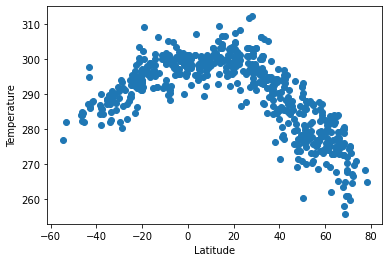

In [9]:
# Plot Lat vs Temp
plt.scatter(weather_data['Lat'],weather_data['Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f'Temperatures are warmest near the equator and ')
print(f'decrease as one moves away from the equator. ')
plt.savefig('lat_vs_temp.png')
plt.show()

Humidity does not seem closely corralated to latitudes. 


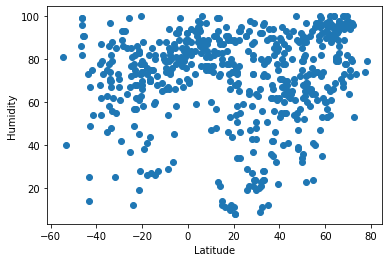

In [10]:
# Plot Lat vs Humidity
plt.scatter(weather_data['Lat'],weather_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'Humidity does not seem closely corralated to latitudes. ')
plt.savefig('lat_vs_humidity.png')
plt.show()

Cloudines does not seem closely corralated to latitudes. 


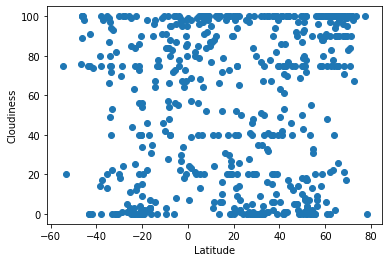

In [11]:
# Plot Lat vs Cloudiness
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'Cloudines does not seem closely corralated to latitudes. ')
plt.savefig('lat_vs_cloudiness.png')
plt.show()

Wind Speed does not seem closely corralated to latitudes. 


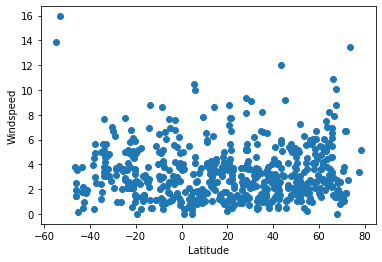

In [12]:
# Plot Lat vs Windspeed
plt.scatter(weather_data['Lat'],weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f'Wind Speed does not seem closely corralated to latitudes. ')
plt.savefig('lat_vs_windspeed.png')
plt.show()

## Linear Regression

In [13]:
# Test whether city latitude is north (> 0) or south (< o)
# Put in North or South bins and do regression

weather_data['Hemisphere'] = ['North' if x > 0 else 'South' for x in weather_data['Lat']]
# weather_data

south_cities = weather_data[weather_data['Hemisphere'] == 'South']
north_cities = weather_data[weather_data['Hemisphere'] == 'North']


#### More data from Northern hemisphere may skew analysis.
There are 394 observations from the northern hemisphere and only 180 from the
southern hemisphere.

In [23]:
south_cities.describe()

,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Date
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,1.800000e+02
mean,-20.589312,23.365430,293.556556,71.138889,51.938889,3.418333,1.633730e+09
std,13.107123,95.098186,5.965589,18.175975,37.348003,2.267190,2.813635e+02
min,-54.800000,-175.200000,276.960000,12.000000,0.000000,0.000000,1.633729e+09
25%,-30.321175,-57.576450,289.220000,64.750000,13.750000,1.747500,1.633729e+09
50%,-20.300000,18.828850,294.065000,75.000000,56.500000,3.035000,1.633730e+09
75%,-8.883375,115.711550,298.375000,83.000000,86.250000,4.822500,1.633730e+09
max,-0.316700,175.515300,309.100000,100.000000,100.000000,15.950000,1.633730e+09


In [24]:
north_cities.describe()

,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Date
count,394.000000,394.000000,394.000000,394.00000,394.000000,394.000000,3.940000e+02
mean,38.347941,14.628868,288.469670,71.77665,57.329949,3.200305,1.633730e+09
std,20.565549,88.226109,11.681579,22.60122,39.497129,2.171455,2.793392e+02
min,0.133300,-173.300000,255.870000,8.00000,0.000000,0.000000,1.633729e+09
25%,20.821500,-70.899750,278.217500,61.00000,17.000000,1.562500,1.633729e+09
50%,38.891650,21.899400,290.815000,77.00000,75.000000,2.695000,1.633730e+09
75%,56.207500,88.083350,298.617500,90.00000,99.000000,4.127500,1.633730e+09
max,78.218600,179.316700,312.260000,100.00000,100.000000,13.500000,1.633730e+09


The r-squared is: 0.721311654873944
Temperature is strongly corralated with northern latitudes.


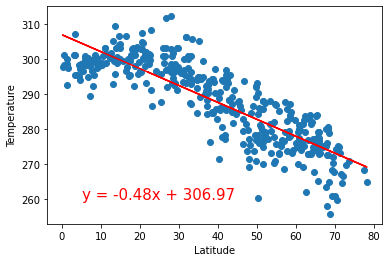

In [14]:
# Northern Hemisphere - Temp vs. Latitude Linear Regression  

x_values = north_cities['Lat']
y_values = north_cities['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
print(f'Temperature is strongly corralated with northern latitudes.')
plt.show()

The r-squared is: 0.5552683409632458
Temperature is moderatley corralated with Southern latitudes.


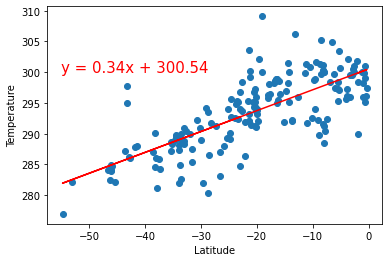

In [15]:
# Southern Hemisphere - Temp vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
print(f'Temperature is moderatley corralated with Southern latitudes.')
plt.show()

The r-squared is: 0.01802758236771908
Humidity is not strongly corralated with latitudes in the North.


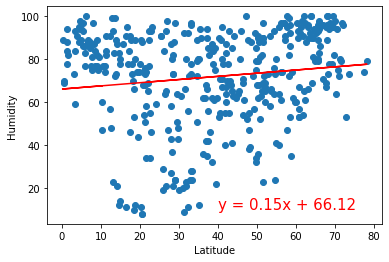

In [16]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 

x_values = north_cities['Lat']
y_values = north_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print(f'Humidity is not strongly corralated with latitudes in the North.')
plt.show()

The r-squared is: 0.017034398972649224
Humidity is not corralated with latitudes in the south.


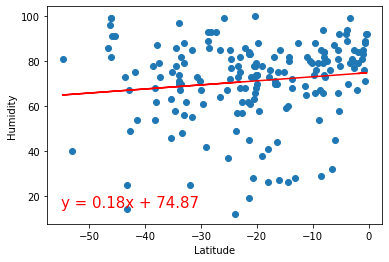

In [17]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print(f'Humidity is not corralated with latitudes in the south.')
plt.show()

The r-squared is: 0.01795532985194522
Cloudiness is not strongly corralated with northern latitudes.


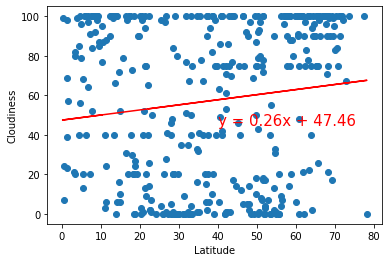

In [28]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = north_cities['Lat']
y_values = north_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
print(f'Cloudiness is not strongly corralated with northern latitudes.')
plt.show()


The r-squared is: 0.003041585580683902
Cloudiness is not strongly corralated with southern latitudes.


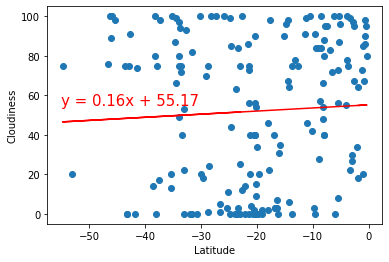

In [19]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
print(f'Cloudiness is not strongly corralated with southern latitudes.')
plt.show()

The r-squared is: 0.020913657148179842
Wind Speed is not corralated with northern latitudes.


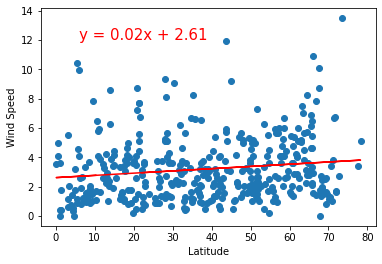

In [20]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = north_cities['Lat']
y_values = north_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
print(f'Wind Speed is not corralated with northern latitudes.')
plt.show()


The r-squared is: 0.014261756130920044
Wind Speed is moderately corralated with southern latitudes.


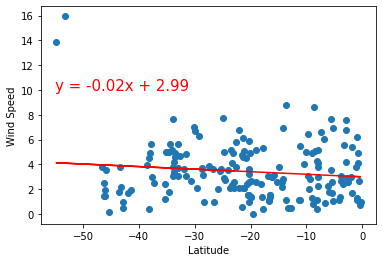

In [21]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = south_cities['Lat']
y_values = south_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
print(f'Wind Speed is moderately corralated with southern latitudes.')
plt.show()